In [67]:
# library
import matplotlib.pyplot as plt
import pandas as pd
from rake_nltk import Rake
from tika import parser
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer

In [68]:
def document_to_text(document_path):
    # document = request.FILES['document']
    parsed = parser.from_file(document_path)
    text = parsed['content']
    if parsed['content'] == None:
        print("The submitted document cannot be read.")
    try:
        text = text.replace('\n', '')
    except:
        pass
    return text

In [3]:
def compile_document_text(text):
    job_descriptions = pd.read_csv('data/job_descriptions.csv', index_col=0)
    data = [['resume', text]]
    basic_documentdf = pd.DataFrame(data, columns = ['title', 'description'])
    return basic_documentdf

In [4]:
def text_to_bagofwords(df):
    df['rake_key_words'] = ''
    r = Rake()
    for index, row in df.iterrows():
        r.extract_keywords_from_text(row['description'])
        key_words_dict_scores = r.get_word_degrees()
        row['rake_key_words'] = list(key_words_dict_scores.keys())
# Transform key words into bag of words
    df['bag_of_words'] = ''
    for index, row in df.iterrows():
        words = ''
        words += ' '.join(row['rake_key_words']) + ' '
        row['bag_of_words'] = words
    verbose_documentdf = df
    return verbose_documentdf

In [5]:
def join_and_condense(df):
    job_descriptions = pd.read_csv('data/job_descriptions.csv', index_col=0)
    job_descriptions = job_descriptions.append(df)
    recommend_df = job_descriptions[['title', 'bag_of_words']]
    return recommend_df

In [6]:
def vectorize_text(df):
    count = CountVectorizer()
    count_matrix = count.fit_transform(df['bag_of_words'])
    cosine_sim = cosine_similarity(count_matrix, count_matrix)
    return cosine_sim

In [7]:
def recommend_100(df, matrix):
    recommended_jobs = []
    indices = pd.Series(df['title'])
    idx = indices[indices == 'resume'].index[0]
    score_series = pd.Series(matrix[idx]).sort_values(ascending = False)
    top_100_indices = list(score_series.iloc[1:101].index)

    for i in top_100_indices:
        recommended_jobs.append(list(df['title'])[i])

    return recommended_jobs

In [8]:
def format_recommendations(recommendations):
    jobs10 = []
    for job in recommendations:
        job = job.lower().replace("_", " ").title()
        job = job.replace('Hr Manager', 'HR Manager')
        jobs10.append(job)
    jobs10 = set(jobs10[0:20])
    jobs10 = list(jobs10)
    final_jobs10 = jobs10[0:10]
    for i, item in enumerate(final_jobs10, 1):
        print(i, '. ' + item + '\n', sep='',end='')
    return final_jobs10

In [37]:
def top_100_categories(recommendations):
    df = pd.read_csv('data/job_descriptions.csv', index_col=0)
    user_titles = df[df.title.isin(recommendations)]
    user_titles = user_titles[['title', 'category']]
#     user_titles = user_titles.drop_duplicates(subset="title", keep="last")
    category_list = list(user_titles.category)
    return category_list

In [39]:
def freq(list_of_categories):
    frequency = []
    unique_words = set(list_of_categories)
    for words in unique_words :
        frequency.append(list_of_categories.count(words))
    return frequency

In [54]:
def viz_data(list_of_categories, frequency_of_categories):
    unique_words = set(list_of_categories)
    unique_words = list(unique_words)
    category_values = dict(zip(unique_words, frequency_of_categories))
    category_dict = {key:val for key, val in category_values.items() if val >= 10}
    names=category_dict.keys()
    size=category_dict.values()
    return names, size

In [55]:
def make_viz(names_of_categories, size_of_categories):
# Create a circle for the center of the plot
    my_circle=plt.Circle( (0,0), 0.7, color='white')
# Give color names
    plt.title('Strength Summary')
    plt.pie(size_of_categories, labels=names_of_categories)
    p=plt.gcf()
    p.gca().add_artist(my_circle)
    plt.show()

In [56]:
def analyze(document_path):
    resume_text = document_to_text(document_path)
    basic_documentdf = compile_document_text(resume_text)
    verbose_documentdf = text_to_bagofwords(basic_documentdf)
    recommend_df = join_and_condense(verbose_documentdf)
    cosine_sim = vectorize_text(recommend_df)
    recommended_jobs = recommend_100(recommend_df, cosine_sim)
    final_jobs10 = format_recommendations(recommended_jobs)
    category_list = top_100_categories(recommended_jobs)
    frequency = freq(category_list)
    names, size = viz_data(category_list, frequency)
    strength_summary = make_viz(names, size)

In [57]:
def final_rec(document_path):
    text = document_to_text(document_path)
    basic_documentdf = compile_document_text(text)
    verbose_documentdf = text_to_bagofwords(basic_documentdf)
    recommend_df = join_and_condense(verbose_documentdf)
    cosine_sim = vectorize_text(recommend_df)
    recommended_jobs = recommend_100(document_path, 'resume', cosine_sim)
    recommendations = format_recommendations(recommended_jobs)
    return recommendations

In [69]:
basic_documentdf = "fuck"

SAMUEL LOGAN BELL  ​https://medium.com/@sambellsoup​ | ​https://github.com/sambellsoup https://www.linkedin.com/in/sam--bell/ sambellsoup@gmail.com​ | 757-652-7433 | Brooklyn, NY 11216  Data Scientist and machine learning engineer with a penchant for visualizations and making data interactive. I have experience in data acquisition and data modeling, statistical analysis, and machine learning with a background in Psychology and Education. I bring a unique skill set to team building and project management that helps companies realize their potential with data.   TECHNICAL SKILLS  ​AWS (S3, EC2), Bokeh, Github, Heroku, Linux, NumPy, Python, Pandas, scikit-learn, SQL, Tableau  EMPLOYMENT HISTORY RookiePlay New York, NY Data Science and Engineering Consultant, ​May 2020-Present + Scripted ​ETL ​pipeline using ​NLP​ techniques for topic modeling and data analysis + Created dashboards using ​Python’s​ ​Dash​ and ​Tableau + Engineered job recommendation system  Boy Scouts of America New York, 

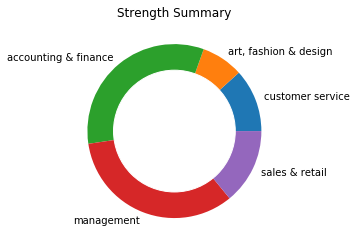

,title,description,rake_key_words,bag_of_words
0,resume,SAMUEL LOGAN BELL ​https://medium.com/@sambel...,"[voter, turnout, ​, lasso, create, making, dat...",voter turnout ​ lasso create making data inter...


In [74]:
document_path = (r"C:\Users\sambe\Desktop\Resume_May2020.pdf")
resume_text = document_to_text(document_path)
print(resume_text)
basic_documentdf = compile_document_text(resume_text)

verbose_documentdf = text_to_bagofwords(basic_documentdf)

recommend_df = join_and_condense(verbose_documentdf)

cosine_sim = vectorize_text(recommend_df)
print(cosine_sim)
recommended_jobs = recommend_100(recommend_df, cosine_sim)

final_jobs10 = format_recommendations(recommended_jobs)

category_list = top_100_categories(recommended_jobs)

frequency = freq(category_list)

names, size = viz_data(category_list, frequency)

strength_summary = make_viz(names, size)
basic_documentdf

Indeed ResumeAbdul AlbabBronx, NY 10467abdulalbab2_n6u@indeedemail.com(347) 615-8170Work ExperienceAccountantCS Corporation - Bronx, NYJune 2017 to Present• Manage and oversee daily Accounts Payable and Accounts Receivable process • Update cash flow reports on a weekly basis to summarize all payments received and sent out • Perform monthly bank reconciliation. Report to management any variances that could not beresolved • Manage day to day administration of cash, oversee the timely and accurate processing of invoices,purchase orders, credit memos and payment transactions • Develop and verify all invoices to management for approval process • Create and analyze budget reports, prepare reports that compare budget versus cost, along with awrite up for management • Manage all payment models and monthly payment schedules to ensure timely payment to vendors • Responsible for close of quarterly financials and creating quarterly and annual financial statementsincluding Income Statement, Balance

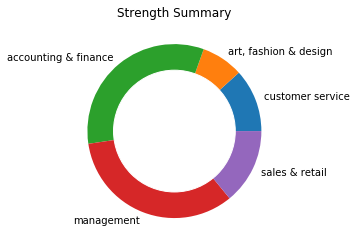

,title,description,rake_key_words,bag_of_words
0,resume,"Indeed ResumeAbdul AlbabBronx, NY 10467abdulal...","[clients, •, learned, processing, calculated, ...",clients • learned processing calculated deduct...


In [75]:
document_path = (r"C:\Users\sambe\Projects\Cover_Letter_Analysis\data\documents\ResumeAbdulAlbab.pdf")
resume_text = document_to_text(document_path)
print(resume_text)
basic_documentdf = compile_document_text(resume_text)

verbose_documentdf = text_to_bagofwords(basic_documentdf)

recommend_df = join_and_condense(verbose_documentdf)

cosine_sim = vectorize_text(recommend_df)
print(cosine_sim)
recommended_jobs = recommend_100(recommend_df, cosine_sim)

final_jobs10 = format_recommendations(recommended_jobs)

category_list = top_100_categories(recommended_jobs)

frequency = freq(category_list)

names, size = viz_data(category_list, frequency)

strength_summary = make_viz(names, size)
basic_documentdf

Indeed ResumeAhmad PirzadaFort Lauderdale, FLahmadpirzada2_k25@indeedemail.com954-701-2442Detail-oriented, efficient and organized professional with over 30 years of experience in accounting.  #readytoworkWork ExperienceConstruction AccountantFlorida Atlantic University - FAU - Boca Raton, FLJuly 2019 to June 2020Florida Atlantic University (FAU) is a student-centered public university  • Created New minor Projects at the request of Project Managers • Reviewed and Approval ofRequisition • Created budget for new projects • Approved invoices submitted for payment • Set up new VendorsControllerWorld Jet, Inc - Fort Lauderdale, FLJune 2012 to February 2019An aviation services company focused on fixed-base operator (FBO), and hangar rental services  • Managed all Accounts Receivable and Accounts Payable • Prepare daily bank deposits, as well as reviewed bank balances and credit card activities • Conducted monthly bank reconciliation and bi-weekly payroll • Produced financial reports when re

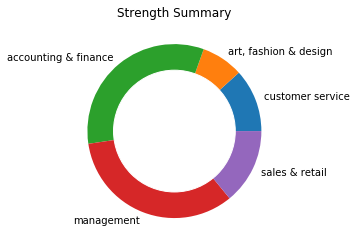

,title,description,rake_key_words,bag_of_words
0,resume,"Indeed ResumeAhmad PirzadaFort Lauderdale, FLa...","[audit, inventory, retailing, organized, profe...",audit inventory retailing organized profession...


In [72]:
document_path = (r"C:\Users\sambe\Projects\Cover_Letter_Analysis\data\documents\ResumeAhmadPirzada.pdf")
resume_text = document_to_text(document_path)
print(resume_text)
basic_documentdf = compile_document_text(resume_text)

verbose_documentdf = text_to_bagofwords(basic_documentdf)

recommend_df = join_and_condense(verbose_documentdf)

cosine_sim = vectorize_text(recommend_df)

recommended_jobs = recommend_100(recommend_df, cosine_sim)

final_jobs10 = format_recommendations(recommended_jobs)

category_list = top_100_categories(recommended_jobs)

frequency = freq(category_list)

names, size = viz_data(category_list, frequency)

strength_summary = make_viz(names, size)
basic_documentdf

1. Account Manager
2. Manufacturing Supervisor
3. Protective Services Manager
4. Proposal Manager
5. Program Coordinator
6. Training Manager
7. Executive Director
8. Security Officer
9. Medical Science Liaison
10. Document Management Analyst


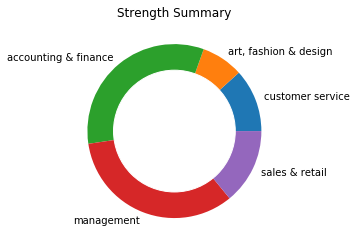

In [61]:
document_path = (r"C:\Users\sambe\Projects\Cover_Letter_Analysis\data\documents\ResumeAteliaDeaza.pdf")
analyze(document_path)

1. Account Manager
2. Manufacturing Supervisor
3. Protective Services Manager
4. Proposal Manager
5. Program Coordinator
6. Training Manager
7. Executive Director
8. Security Officer
9. Medical Science Liaison
10. Document Management Analyst


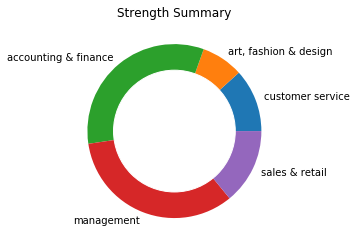

In [62]:
document_path = (r"C:\Users\sambe\Downloads\Resume.pdf")
analyze(document_path)

In [225]:
def top10(document_path):
    document_path = (r"C:\Users\sambe\Projects\Cover_Letter_Analysis\data\documents\ResumeBrittanyMouzoon.pdf")
    text = document_to_text(document_path)
#     print("Extracting text from document...")
    basic_documentdf = compile_document_text(text)
#     print("Creating dataframe...")
    verbose_documentdf = text_to_bagofwords(basic_documentdf)
#     print("Extracting key words from text...")
    recommend_df = join_and_condense(verbose_documentdf)
#     print("Compiling data...")
    cosine_sim = vectorize_text(recommend_df)
#     print("Calculating similarities...")
    recommended_jobs = recommend_100('resume', cosine_sim)
#     print("Retrieving top recommendations...")
    recommendations = format_recommendations(recommended_jobs)
    return recommendations